# Exercise 5: Measures of central tendency

In this series of excersies 


## Table of Contents 

* Measures of central tendancy and variability 
    * Calculating measures of central tendancy and variability 
    * Representing measures of central tendancy and variability 
* The central limit theorem
* Data from Wu et al. (2017), Nature


## Setup

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

# For retina displays only 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Measures of central tendency and variability

In this section you'll play around with calculating measures of central tendancy and variability with symmetric and skewed data. 

In [3]:
symmetric_data = np.random.normal(0, 3., size=10000)
skew_data = np.random.standard_gamma(1.5, size=10000)

Text(0,0.5,'Counts')

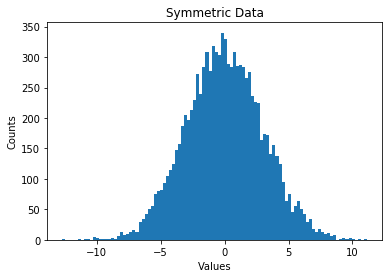

In [4]:
fig, ax = plt.subplots()
counts, bins, bars = ax.hist(symmetric_data, bins=100)
ax.set_title("Symmetric Data")
ax.set_xlabel("Values")
ax.set_ylabel("Counts")

Text(0,0.5,'Counts')

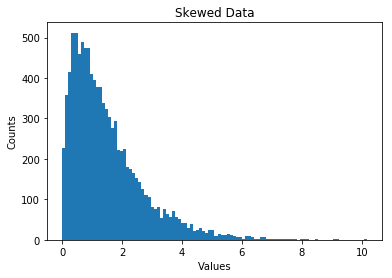

In [5]:
# Make a histogram of the skew data
fig, ax = plt.subplots()
counts, bins, bars = ax.hist(skew_data, bins=100)
ax.set_title("Skewed Data")
ax.set_xlabel("Values")
ax.set_ylabel("Counts")


### Calculating measures of central tendancy and variability

### Central tendancy

In [6]:
# Calculating the mean
sym_mean = symmetric_data.mean()
skw_mean = skew_data.mean()
print(f"Mean for symmetric data is {sym_mean}\nMean for skew data is {skw_mean}")

Mean for symmetric data is -0.012755347431033666
Mean for skew data is 1.5080890820821904


In [8]:
# Calculating the median
sym_median = np.percentile(symmetric_data, 50)
skw_median = np.percentile(skew_data, 50)
print(f"Median for symmetric data is {sym_median}\nMedian for skew data is {skw_median}")

Median for symmetric data is -0.039489253914544636
Median for skew data is 1.1946450989470159


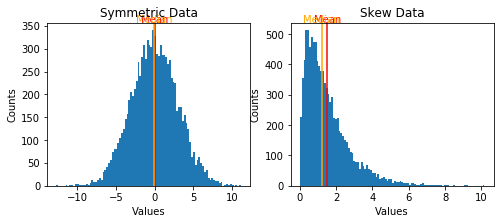

In [9]:
# Redoing plots including means and medians
fig, (ax_sym, ax_skw) = plt.subplots(ncols=2, figsize=(8, 3))
counts, bins, bars = ax_sym.hist(symmetric_data, bins=100)
counts, bins, bars = ax_skw.hist(skew_data, bins=100)
ax_sym.set_title("Symmetric Data")
ax_skw.set_title("Skew Data")
for ax in [ax_sym, ax_skw]:
    ax.set_xlabel("Values")
    ax.set_ylabel("Counts")
for ax, mean in zip([ax_sym, ax_skw], [sym_mean, skw_mean]):
    ax.axvline(mean, color='red')
    _, ymax = ax.get_ylim()
    ax.text(mean, ymax, "Mean", ha='center', color='red')
for ax, mean in zip([ax_sym, ax_skw], [sym_median, skw_median]):
    ax.axvline(mean, color='orange')
    _, ymax = ax.get_ylim()
    ax.text(mean, ymax, "Median", ha='center', color='orange')


### Variability

In [ ]:
# Calculating the standard deviation
# Note the ddof = delta degrees of freedom. This changes n in denominator to n-1
sym_std = symmetric_data.std(ddof=1) 
skw_std = skew_data.std(ddof=1) 
print(f"Sample standard deviation for symmetric data is {sym_std}\nSample standard deviation for skew data is {skw_std}")

In [ ]:
# Redoing plots including mean and standard deviations
fig, (ax_sym, ax_skw) = plt.subplots(ncols=2, figsize=(8, 3))
counts, bins, bars = ax_sym.hist(symmetric_data, bins=100)
counts, bins, bars = ax_skw.hist(skew_data, bins=100)
ax_sym.set_title("Symmetric Data")
ax_skw.set_title("Skew Data")
for ax in [ax_sym, ax_skw]:
    ax.set_xlabel("Values")
    ax.set_ylabel("Counts")
for ax, mean in zip([ax_sym, ax_skw], [sym_mean, skw_mean]):
    ax.axvline(mean, color='red')
    _, ymax = ax.get_ylim()
    ax.text(mean, ymax, "Mean", ha='center', color='red')
for ax, mean, std in zip([ax_sym, ax_skw], [sym_mean, skw_mean], [sym_std, skw_std]):
    ax.axvline(mean+std, color='red', lw=0.5)
    ax.axvline(mean-std, color='red', lw=0.5)
    _, ymax = ax.get_ylim()
    ax.text(mean+std, ymax, "$+\sigma$", ha='center', color='red')
    ax.text(mean-std, ymax, "$-\sigma$", ha='center', color='red')

In [ ]:
# Calculating the IQRs
sym_25 = np.percentile(symmetric_data, 25)
sym_75 = np.percentile(symmetric_data, 75)
skw_25 = np.percentile(skew_data, 25)
skw_75 = np.percentile(skew_data, 75)
print(f"IQR for symmetric data is {sym_25} to {sym_75}\nIQR for skew data is {skw_25} to {skw_75}")

In [ ]:
# Redoing plots including medians and IQR
fig, (ax_sym, ax_skw) = plt.subplots(ncols=2, figsize=(8, 3))
counts, bins, bars = ax_sym.hist(symmetric_data, bins=100)
counts, bins, bars = ax_skw.hist(skew_data, bins=100)
ax_sym.set_title("Symmetric Data")
ax_skw.set_title("Skew Data")
for ax in [ax_sym, ax_skw]:
    ax.set_xlabel("Values")
    ax.set_ylabel("Counts")
for ax, median in zip([ax_sym, ax_skw], [sym_median, skw_median]):
    ax.axvline(median, color='orange')
    _, ymax = ax.get_ylim()
    ax.text(median, ymax, "Median", ha='center', color='orange')
for ax, q1, q3 in zip([ax_sym, ax_skw], [sym_25, skw_25], [sym_75, skw_75]):
    ax.axvline(q1, color='orange', lw=0.5)
    ax.axvline(q3, color='orange', lw=0.5)
    _, ymax = ax.get_ylim()
    ax.text(q1, ymax, "25%", ha='center', color='orange')
    ax.text(q3, ymax, "75%", ha='center', color='orange')

### Representing measures of central tendency and variability

In [ ]:
# Error bar
fig, (ax_means, ax_medians) = plt.subplots(ncols=2, sharey=True)
ax_means.errorbar([0, 1], [sym_mean, skw_mean], yerr=[sym_std, skw_std], marker='o', linestyle='none')
ax_means.set_xlim([-.5, 1.5])
ax_means.set_xticks([0,1])
ax_means.set_xticklabels(["Symmetric", "Skew"])
ax_means.set_xlabel("Distributions")
ax_means.set_ylabel("Mean $\pm \sigma$")

ax_medians.errorbar([0, 1], [sym_median, skw_median], yerr=[[sym_median-sym_25, skw_median-skw_25],[sym_75-sym_median, skw_75-skw_median]], marker='o', linestyle='none')
ax_medians.set_xlim([-.5, 1.5])
ax_medians.set_xticks([0,1])
ax_medians.set_xticklabels(["Symmetric", "Skew"])
ax_medians.set_xlabel("Distributions")
ax_medians.set_ylabel("Median $\pm$ IQR")

In [ ]:
# Box plot
fig, ax = plt.subplots(figsize=(3, 3))
ax.boxplot([symmetric_data, skew_data], notch=True, positions=[0,1])
ax.set_xlim([-.5, 1.5])
ax.set_xticks([0,1])
ax.set_xticklabels(["Symmetric", "Skew"])
ax.set_xlabel("Distributions")
ax.set_ylabel("Values")

In [ ]:
# Time series data
def data_generator(F, noise=3.0, start=0):
    data = [F[0]]
    for f in F[1:]:
        data.append(data[-1] + f + noise*(np.random.random()-0.5))
    return(np.array(data))

T = np.arange(0, 10, 0.01)
F = np.sin(T)
data_sets = np.array([data_generator(F) for i in range(1000)])

In [ ]:
# plotting all traces using transparency
fig, ax = plt.subplots()
for data in data_sets:
    ax.plot(T, data, color='k', alpha=.005)

In [ ]:
# plotting only median and IQR
median = np.percentile(data_sets, 50, axis=0)
q1 = np.percentile(data_sets, 25, axis=0)
q3 = np.percentile(data_sets, 75, axis=0)

fig, ax = plt.subplots()
ax.plot(T, median, 'k')
ax.fill_between(T, q1, q3, color=".8")

## The Central Limit Theorem


In [ ]:
# Write a loop to take N samples from a distribution of your choice 10000 times. Calculate the mean of the samples and the and append to lists
N = ???
sample_means = []
sample_std = []
for i in range(10000):
    ???


In [ ]:
# plot a histogram of the distribution of your choice



In [ ]:
# plot a histogram of samples_means 



In [ ]:
# Calculate standard deviation of sample_means (varibility in the mean)



In [ ]:
# Show that variability in the mean equals average variability of the samples divided by sqrt N



## Data from Wu et al. (2017), Nature 

In [ ]:
# Import data from Wu as a pandas DataFrame
Wu_data = pd.read_csv(os.path.join("data", "ex5_dataset.csv"))

In [ ]:
# Start by charicterizing the means, std deviations, SEM of data. Plot means and sem using error bar format above. 



In [ ]:
# Plot two conditions using medians and IQR or a full box plot



In [ ]:
# Recreate the CDF in the figure by 
# 1. selecting the WT rescue column
# 2. dropping the nan values
# 3. Sorting them
# 4. Indexing the data, normalizing to get a fraction, and plotting fraction vs data. 
# MODIFY THIS CODE TO INLCUDE THE SYT1,7 Data

WT_sorted = np.sort(Wu_data["WT/Rescue"].dropna())
normed_fraction = np.arange(0, len(WT_sorted)) / len(WT_sorted)
fig, ax = plt.subplots()
ax.plot(WT_sorted, normed_fraction)

In [ ]:
# Recreate the denisty plot using pandas built in plotting functions hist or kde
Wu_data.???